<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Data Standardization
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>What is Data Standardization?</strong>
<br>
• Data standardization is a preprocessing technique used to adjust the scale of features in a dataset to make them comparable.
<br>
• This is essential for many machine learning algorithms that assume data is normally distributed or require features to be on a similar scale for optimal performance.
<br>
• The goal of standardization is to transform features so that they have a mean of 0 and a standard deviation of 1.
</div>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV File
df = pd.read_csv("Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
41,15591915,Female,33,51000,0
355,15606472,Male,60,34000,1
77,15774179,Female,22,27000,0
78,15667265,Female,28,87000,0
190,15730448,Male,24,84000,0


In [3]:
# Removing some unnecessary Column
df = df.iloc[:,2:]

In [4]:
# Sample Data
df.sample(5)

,Age,EstimatedSalary,Purchased
206,55,130000,1
286,37,62000,0
298,45,79000,0
117,36,52000,0
396,51,23000,1


In [5]:
# Shape of the Data
df.shape

(400, 3)

In [6]:
# Description of the Data
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• <strong>Training Set :</strong> Used to train the model.
<br>
• <strong>Testing Set :</strong> Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• <strong>arrays :</strong> This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• <strong>test_size :</strong> Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• <strong>random_state :</strong> Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• <strong>shuffle :</strong> A boolean that indicates whether to shuffle the data before splitting.
</div>

In [7]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [8]:
# Dividing Features and Target Vaiables
X = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [9]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Shape of Traning and Testing Set 
print(X_train.shape, X_test.shape)

(280, 2) (120, 2)


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>StandardScaler</strong>
<br>
• The StandardScaler is a feature scaling method commonly used in machine learning to standardize features by removing the mean and scaling to unit variance.
<br>
• This is particularly useful when your features have different units or are on different scales, and it's essential for many algorithms that assume normally distributed data or are sensitive to feature scaling.
<br>
<br>
<strong>How StandardScaler Works</strong>
<br>
<strong>Mean Removal</strong>
<br>
• Subtract the mean of each feature from the data. This centers the data around zero. 
<br>
• For a feature $x$, the mean is $\mu$.
<br>
<strong>Scaling to Unit Variance</strong>
<br>
• Divide by the standard deviation of each feature. This scales the data so that each feature has a variance of 1. 
<br>
• For a feature $x$, the standard deviation is $\sigma$.
<br>
• The formula for standardizing a feature $x$ is :
$$x' = \frac{x - \mu}{\sigma}$$
where:
<br>
• $x$ is the original value
<br>
• $\mu$ is the mean of the feature
<br>
• $\sigma$ is the standard deviation of the feature
<br>
• $x'$ is the standardized value
<br>
<br>
<strong>Benefits of Using StandardScaler</strong>
<br>
<strong>Standardization of Data</strong>
<br>
• Ensures that features are on the same scale, which can improve the performance and convergence speed of many machine learning algorithms.
<br>
<strong>Comparison Across Features</strong>
<br>
• Makes it easier to compare features and interpret the results, as all features are standardized to have a mean of 0 and a variance of 1.
<br>
<strong>Algorithm Performance</strong>
<br>
• Algorithms like Support Vector Machines (SVM), k-Nearest Neighbors (k-NN) and Principal Component Analysis (PCA) often perform better when the data is standardized.
</div>

In [11]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [12]:
# Creating StandardScaler Object
s = StandardScaler()

In [13]:
# Fit and Transform is called on Traning Data only
# This computes the mean and standard deviation from the training data 
# And applies the transformation (standardization) in one step
X_train_scaled = s.fit_transform(X_train)

In [14]:
# Mean and Standard Deviation of Traning Set
print(s.mean_, s.scale_)

[3.78642857e+01 6.98071429e+04] [1.01999375e+01 3.45792870e+04]


In [15]:
# Transformation on Testing Data 
# Uses the mean and standard deviation computed from the training data to standardize the testing data
X_test_scaled = s.transform(X_test)

In [16]:
# After calling the transform method (or fit_transform method) on the Data
# It returns a NumPy array, So we have to convert it into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
# Description of Data after Scaling
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Understanding Feature Scaling and Relationships</strong>
<br>
• Scaling transforms the data but it does not change the underlying relationships between features.
<br>
• For example, if two features are positively correlated they will remain positively correlated after scaling. 
<br>
• The shape of the relation won't change only the scale of the axes will change.
<br>
• When you standardize the features you're shifting the data to have a mean of 0 and a standard deviation of 1. 
<br>
• This changes the numerical values but preserves the relative relationships.
</div>

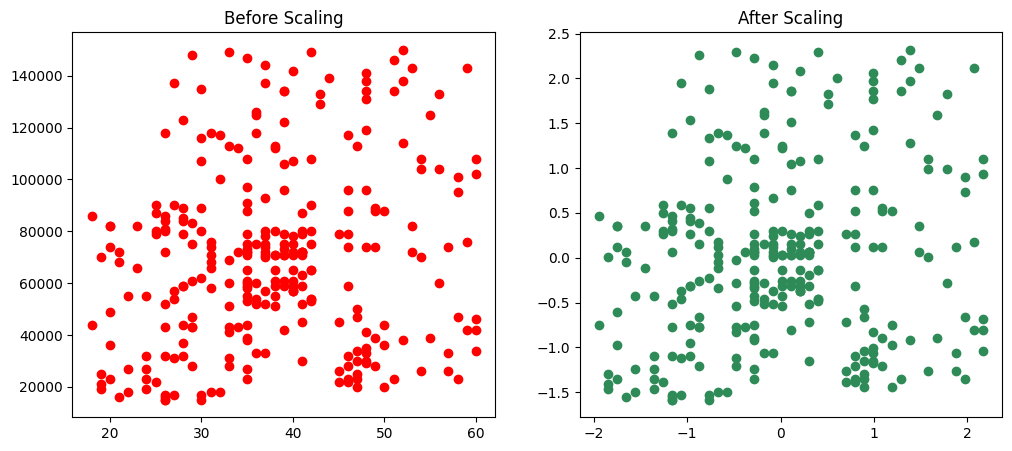

In [18]:
# Comparing Features before and after Scaling
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
ax[0].scatter(X_train["Age"], X_train["EstimatedSalary"], color="red")
ax[0].set_title("Before Scaling")
ax[1].scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="seagreen")
ax[1].set_title("After Scaling")
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

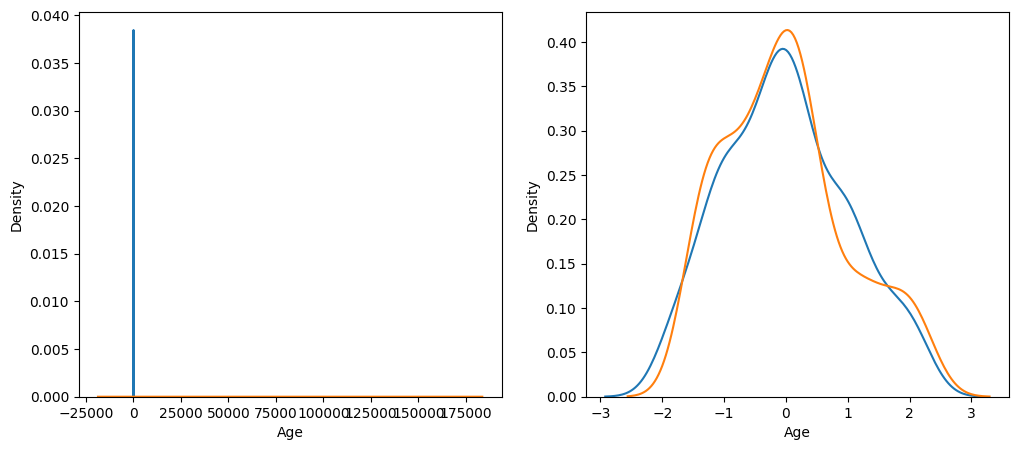

In [19]:
# Comparing Distribution before and after Scaling
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train["Age"], ax=ax[0])
sns.kdeplot(X_train["EstimatedSalary"], ax=ax[0])

sns.kdeplot(X_train_scaled["Age"], ax=ax[1])
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax[1])

<Axes: xlabel='Age', ylabel='Density'>

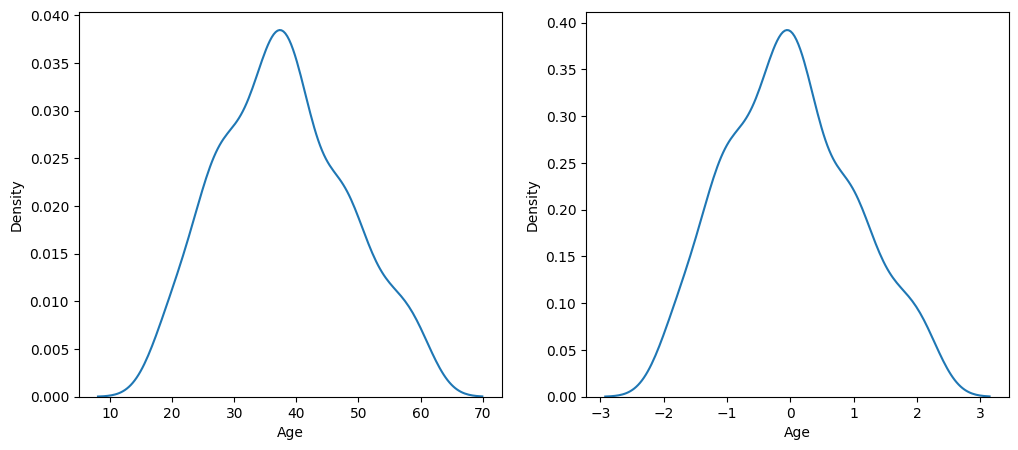

In [20]:
# Univariate Analysis before and after Scaling
# The scaling preserves the relative distribution shape of the features while changing their numerical representation
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train["Age"], ax=ax[0])
sns.kdeplot(X_train_scaled["Age"], ax=ax[1])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

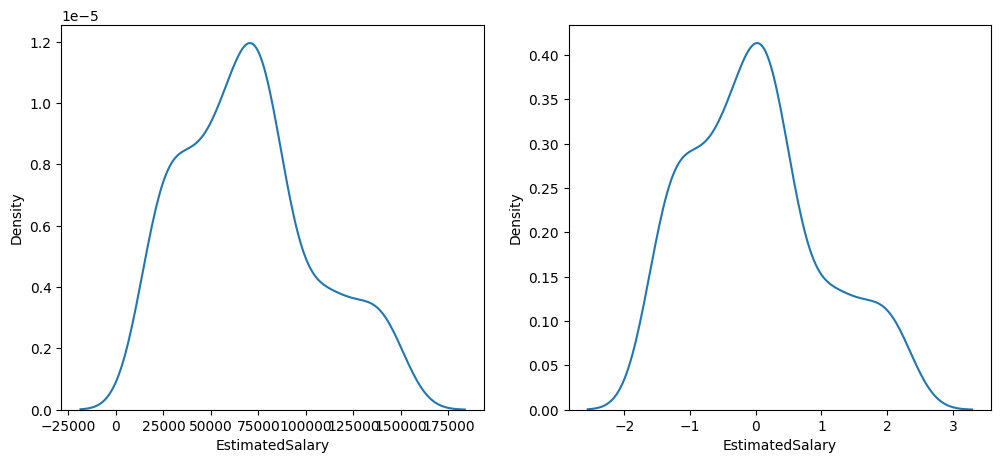

In [21]:
# Univariate Analysis before and after Scaling
# The scaling preserves the relative distribution shape of the features while changing their numerical representation
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train["EstimatedSalary"], ax=ax[0])
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax[1])

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Why Scaling Matters?</strong> 
<br>
• KNN is a distance-based algorithm meaning it calculates the distance between data points to make predictions. 
<br>
• If features are on different scales features with larger ranges can disproportionately influence the distance calculations.
<br>
• For example, if one feature ranges from 0 to 1 and another ranges from 0 to 1000 the second feature will dominate the distance metric.
<br>
<strong>Improved Model Performance</strong>
<br>
• By scaling all features contribute equally to the distance calculations allowing the algorithm to make more balanced and accurate predictions.
<br>
• With features standardized to a similar scale KNN can better identify the nearest neighbors leading to more accurate classifications.
</div>

In [22]:
# Importing KNN Model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [23]:
# Creating KNN Objects for Orignal and Scaled Data
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier_scaled = KNeighborsClassifier(n_neighbors=5)

In [24]:
# Fitting Orignal Model on Orignal Data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Fitting Scaled Model on Scaled Data
knn_classifier_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
# Prediction from Orignal Data
y_pred = knn_classifier.predict(X_test)

In [27]:
# Prediction from Scaled Data
y_pred_scaled = knn_classifier_scaled.predict(X_test_scaled)

In [28]:
# Importing Accuracy Score
from sklearn.metrics import accuracy_score

In [29]:
# Accuracy Score on Orignal Data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy, 2))

Accuracy Score : 0.82


In [30]:
# Accuracy Score on Scaled Data
accuracy = accuracy_score(y_test, y_pred_scaled)
print("Accuracy Score :", round(accuracy, 2))

Accuracy Score : 0.92
